# 120 Years of Olympic History

A.J. Lozano
4/15/2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Copying Data Frame for manipulation

In [6]:
df2 = df.copy()

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
#removing null values from medal counts...
# this analysis will look at several variables that lead to medal count.
#removing values that lack medal values are warranted

df2.dropna(inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
ID        30181 non-null int64
Name      30181 non-null object
Sex       30181 non-null object
Age       30181 non-null float64
Height    30181 non-null float64
Weight    30181 non-null float64
Team      30181 non-null object
NOC       30181 non-null object
Games     30181 non-null object
Year      30181 non-null int64
Season    30181 non-null object
City      30181 non-null object
Sport     30181 non-null object
Event     30181 non-null object
Medal     30181 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [9]:
# create medal count into ordered categorical type

medal_classes = ['Gold', 'Silver', 'Bronze']
Medal = pd.api.types.CategoricalDtype(ordered = True, categories = medal_classes)

df2['Medal'] = df2['Medal'].astype(Medal)

In [10]:
df2['Medal_Value'] = df2['Medal']

#df2['Sex_Value'] = df2['Sex']

In [11]:
# Let's change Gold Silver and Bronze into values we can plot and count
#normally Gold would be 1, but due to counting values, we will assign it a value of 3


Med = {"Bronze" : 1, "Silver" : 2, "Gold" : 3}
df2['Medal_Value'] = df2['Medal_Value'].map(Med) 

In [12]:
# Let's also assign numeric values to gender to assist with plotting and counting Female and Male

#gend = {"F" : 1, "M" : 2}
#df2["Sex_Value"] = df2["Sex_Value"].map(gend) 

In [13]:
# high-level overview of data shape and composition
print('This is df2 shape:',df2.shape)

print('\n')

print('df2 data types:',df2.dtypes)

print('\n')

print('df2 column and row info:',df2.head(5))

print('\n')

print('df2 value descriptions:', df2.describe())

This is df2 shape: (30181, 16)


df2 data types: ID                int64
Name             object
Sex              object
Age             float64
Height          float64
Weight          float64
Team             object
NOC              object
Games            object
Year              int64
Season           object
City             object
Sport            object
Event            object
Medal          category
Medal_Value       int64
dtype: object


df2 column and row info:     ID                      Name Sex   Age  Height  Weight     Team  NOC  \
40  16  Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0  Finland  FIN   
41  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
42  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
44  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
48  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   

          Games  Year  Season    City       Sport  \
40  2014 Winter 

### DF2 Structure:

Our data set has 30181 medals with 16 attributes. 

Let's work on renaming and removing a few unwanted columns...

### DF Olympic Interests:

All types of good stuff!!!. 

Obviously, the best medal you can earn is a gold and the worst(even though it's an incredible accomplishment) is a bronze.  Silver lands right in the middle.

In [14]:
# lets remove columns that are not needed

#df2.drop(['ID'], axis = 1, inplace = True)

In [15]:
df2.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Value
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,1


# Univariate Data Exploration

Medal Exploration

Bling Baby!!!

In [16]:
# Lets look at the values for medal

df2['Medal'].value_counts()

Gold      10167
Bronze    10148
Silver     9866
Name: Medal, dtype: int64

In [17]:
# create medal count into ordered categorical type

medal_classes = ['Gold', 'Silver', 'Bronze']
Medal = pd.api.types.CategoricalDtype(ordered = True, categories = medal_classes)

df2['Medal'] = df2['Medal'].astype(Medal)

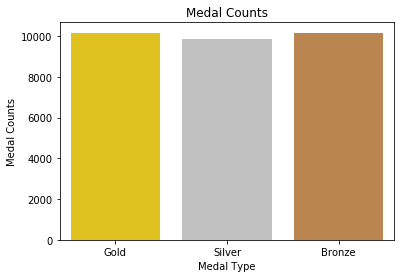

In [18]:
# Lets take a look at our main topic area...Bling Baby!!!

base_color = sns.color_palette()[0]

color = ['gold', 'silver', 'peru']
#normally we would want colors to be uniform, but I could't pass up the chance to color coordinate.

medal_order = df2['Medal'].value_counts().index

medal_plot = sns.countplot(data = df2, x = 'Medal',  palette = color);
plt.title("Medal Counts");
plt.xlabel('Medal Type');
plt.ylabel('Medal Counts');

Gold accounts for 10167, 
Silver accounts for 10148,
Bronze accounts for 9866

med_points = df2.shape[0]

max_count = df2['Medal'].value_counts().max()

med_proportion = max_count / med_points


tick_props = np.arange(0, med_proportion, .02)
tick_names = ['{:0.2f}'.format for (v) in tick_props]

sns.countplot(data = df2,x = 'Medal',  palette = color);
plt.yticks(tick_props * med_points, tick_names);


Age Info

In [19]:
# Age Descriptive Statistics
df2['Age'].describe()

count    30181.000000
mean        25.429012
std          5.049684
min         13.000000
25%         22.000000
50%         25.000000
75%         28.000000
max         66.000000
Name: Age, dtype: float64

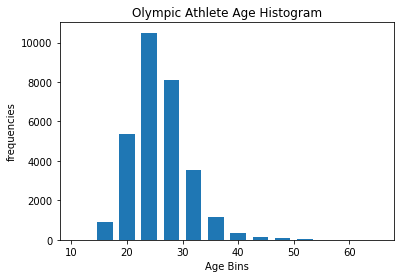

In [20]:
# Let's check out the age of our athletes

bins = np.arange(10, df2['Age'].max()+1,4)

plt.hist(data = df2, x = 'Age', bins = bins, rwidth = .7);
plt.title('Olympic Athlete Age Histogram');
plt.xlabel('Age Bins');
plt.ylabel('frequencies');

Height and Weight Info

It's a game of Inches and Pounds

In [21]:
# Height and Weight Descriptive Statistics

df2[['Height','Weight']].describe()

,Height,Weight
count,30181.000000,30181.000000
mean,177.642358,73.753554
std,10.924188,15.004992
min,136.000000,28.000000
25%,170.000000,63.000000
50%,178.000000,73.000000
75%,185.000000,83.000000
max,223.000000,182.000000


In [22]:
#lets convert height in centimeters to inches and lets convert weight in kilograms to the lbs
#1 centi = .393701 inches
#1 kilo = 2.20462 lbs

df2['Height_conv'] =  .393701

df2['Weight_conv'] =  2.20462

df2['adjusted_height'] = df2['Height'] * df2 ['Height_conv']
df2['adjusted_weight'] = df2['Weight'] * df2 ['Weight_conv']

In [96]:
df2[['adjusted_height','adjusted_weight']].describe()

,adjusted_height,adjusted_weight
count,30181.000000,30181.000000
mean,69.937974,162.598559
std,4.300864,33.080305
min,53.543336,61.729360
25%,66.929170,138.891060
50%,70.078778,160.937260
75%,72.834685,182.983460
max,87.795323,401.240840


In [23]:
df2.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Value,Height_conv,Weight_conv,adjusted_height,adjusted_weight
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,1,0.393701,2.20462,72.440984,187.39270
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1,0.393701,2.20462,68.897675,141.09568
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,3,0.393701,2.20462,68.897675,141.09568
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,3,0.393701,2.20462,68.897675,141.09568
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,3,0.393701,2.20462,68.897675,141.09568


In [24]:
# lets make sure changes went through

df2[['adjusted_height','adjusted_weight']].describe()

,adjusted_height,adjusted_weight
count,30181.000000,30181.000000
mean,69.937974,162.598559
std,4.300864,33.080305
min,53.543336,61.729360
25%,66.929170,138.891060
50%,70.078778,160.937260
75%,72.834685,182.983460
max,87.795323,401.240840


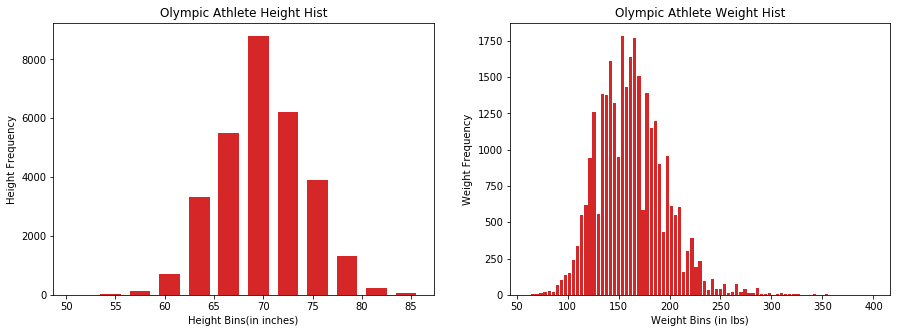

In [25]:
# lets look at a subplot of height and weight characteristics of olympic athletes

height_bins= np.arange(50, df2['adjusted_height'].max()+1,3)
weight_bins= np.arange(60, df2['adjusted_weight'].max()+1,4)

f, axs =plt.subplots(2,2,figsize = (15,5))
sub_color = sns.color_palette()[3]

plt.subplot(1,2,1)

plt.hist(data = df2, x = 'adjusted_height', bins = height_bins, rwidth = .7, color = sub_color)
plt.title('Olympic Athlete Height Hist');
plt.xlabel('Height Bins(in inches)');
plt.ylabel('Height Frequency');

plt.subplot(1,2,2)
plt.hist(data = df2, x = 'adjusted_weight', bins = weight_bins, rwidth = .8, color = sub_color)
plt.title('Olympic Athlete Weight Hist');
plt.xlabel('Weight Bins (in lbs)');
plt.ylabel('Weight Frequency');
# Please Note that y-axis scales do not match

# team appearances



In [26]:
df2['Team'].nunique()

263

It looks like there are a total of 263 countries that have competed in the olympic games listed in the data set.

Hold up...arent there only 195 countries in the world? 

Apparently, the International Olympic Committee (IOC) has a relaxed view of what a country is for competition purposes.

Check out this link if you'd like to read more:
https://wonderopolis.org/wonder/how-many-countries-participate-in-the-olympics

In [27]:
# Lets look at the competing Country athlete olympic appearences
print('Country Value Counts:')
print('\n')
print(df2['Team'].value_counts())

Country Value Counts:


United States                          4273
Soviet Union                           2203
Germany                                1518
Australia                              1196
Russia                                 1091
Canada                                 1024
Great Britain                          1010
Italy                                  1008
France                                  965
East Germany                            935
China                                   897
Japan                                   841
Hungary                                 789
Sweden                                  755
Finland                                 723
Netherlands                             703
Romania                                 595
West Germany                            554
Poland                                  546
South Korea                             525
Norway                                  511
Spain                                   425
Brazil  

In [28]:
# How many unique particpants are there...

print('It looks like there are', df2['ID'].nunique(),'unique participants.')

unique_particpants = df2['ID'].nunique()

It looks like there are 20767 unique participants.


Trophy Case and Country Participation

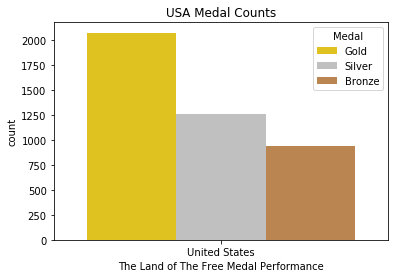

In [29]:
# USA medal performance
#sns.countplot(data =df2, x= )

coloro = ['Gold', 'Silver', 'Peru']

USA = df2.query('Team == "United States"');

sns.countplot(data = USA, x = 'Team',  hue = 'Medal', palette = coloro);
plt.title('USA Medal Counts');
plt.xlabel('The Land of The Free Medal Performance');

Check out USA's medal performance.  Not to shabby.  The sweet land of liberty has over 2000 gold medals, 1250 Silver medals, and almost 1000 bronze medals. 

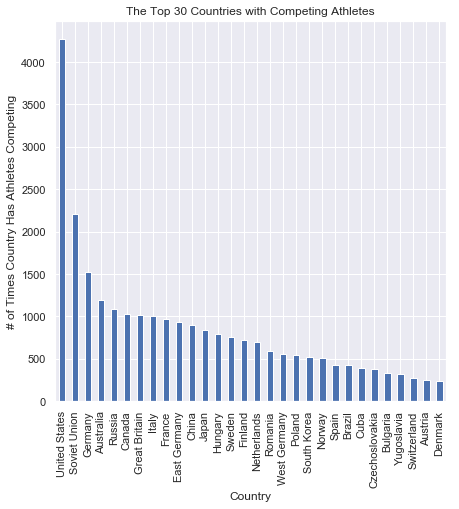

In [30]:
# Lets take a look at the countries most often competing
country_count = df2['Team'].value_counts().sort_values(ascending = False)
sns.set(rc = {'figure.figsize':(7,7)})
color = sns.color_palette()[0]
country_count.iloc[:30].plot(kind = 'bar', color = color);
plt.title('The Top 30 Countries with Competing Athletes');
plt.xlabel('Country');
plt.ylabel('# of Times Country Has Athletes Competing');

The chart helps to visually convey athletes per country in olympic appearences.  The graph is limited to the top 30 countries.  

Well....The Good Ole US of A sends the most athletes to the games. Merica!!!!

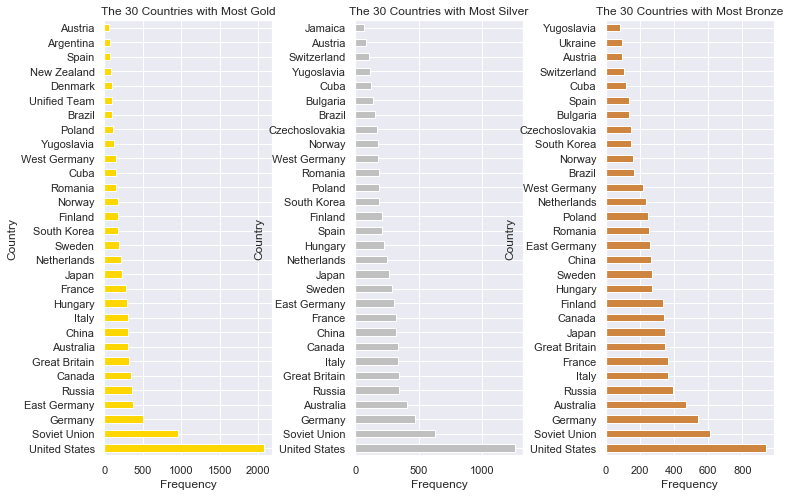

In [31]:
# Lets look at medals per country

Medal_Gold = df2[df2['Medal'] == 'Gold'].groupby('Team')['Medal'].count().sort_values(ascending = False)
Medal_Silver = df2[df2['Medal'] == 'Silver'].groupby('Team')['Medal'].count().sort_values(ascending = False)
Medal_Bronze = df2[df2['Medal'] == 'Bronze'].groupby('Team')['Medal'].count().sort_values(ascending = False)
f, axs =plt.subplots(2,2,figsize = (12,8))
plt.subplots_adjust(wspace=.4935)
plt.subplot(1,3,1)
Medal_Gold.iloc[:30].plot(kind = 'barh', color = 'gold');
plt.title('The 30 Countries with Most Gold')
plt.xlabel('Frequency');
plt.ylabel('Country');
plt.subplot(1,3,2)
Medal_Silver.iloc[:30].plot(kind = 'barh', color = 'silver');
plt.title('The 30 Countries with Most Silver')
plt.xlabel('Frequency');
plt.ylabel('Country');
plt.subplot(1,3,3)
Medal_Bronze.iloc[:30].plot(kind = 'barh', color = 'peru');
plt.title('The 30 Countries with Most Bronze')
plt.xlabel('Frequency');
plt.ylabel('Country');

The U.S. dominates in Gold, Silver and Bronze Medals.  The Soviet Union and Germany are second in third in all respective medal categories.  
Other notable countries include Australia and Russia.  I'd be curious to see the break down between Summer and Winter Games.

In [ ]:
Athlete Performance

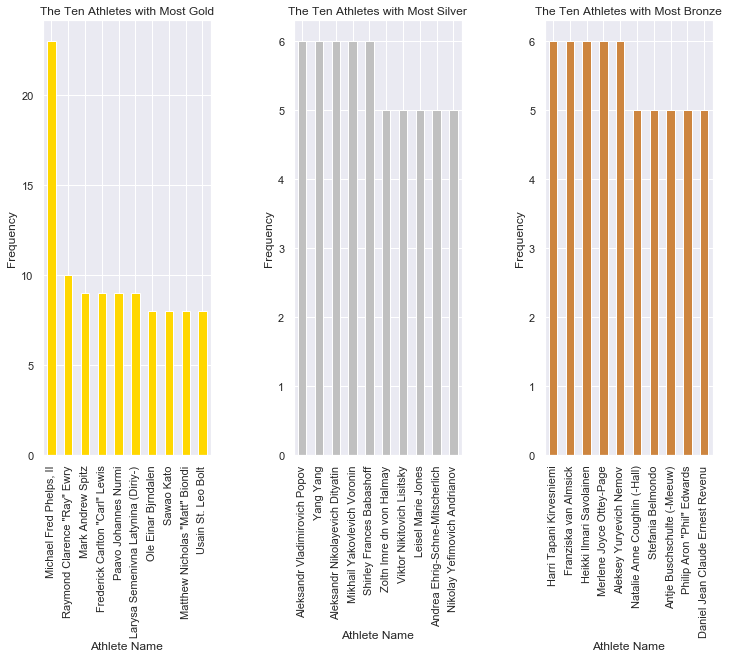

In [33]:
#Athlete Dominance 

Athlete_Gold = df2[df2['Medal'] == 'Gold'].groupby('Name')['Medal'].count().sort_values(ascending = False)
Athlete_Silver = df2[df2['Medal'] == 'Silver'].groupby('Name')['Medal'].count().sort_values(ascending = False)
Athlete_Bronze = df2[df2['Medal'] == 'Bronze'].groupby('Name')['Medal'].count().sort_values(ascending = False)
f, axs =plt.subplots(2,2,figsize = (12,8))
#plt.subplots_adjust(hspace = 0.8)

plt.subplots_adjust(wspace=.4935)
plt.subplot(1,3,1)
Athlete_Gold.iloc[:10].plot(kind = 'bar', color = 'gold');
plt.title('The Ten Athletes with Most Gold')
plt.xlabel('Athlete Name');
plt.ylabel('Frequency');

plt.subplot(1,3,2)
Athlete_Silver.iloc[:10].plot(kind = 'bar', color = 'silver');
plt.title('The Ten Athletes with Most Silver')
plt.xlabel('Athlete Name');
plt.ylabel('Frequency');

plt.subplot(1,3,3)
Athlete_Bronze.iloc[:10].plot(kind = 'bar', color = 'peru');
plt.title('The Ten Athletes with Most Bronze')
plt.xlabel('Athlete Name');
plt.ylabel('Frequency');
#note y index are not equal

Micheal Phelps has won the most gold medals. He's a house hold name because he has 23 gold medals. Is it safe to say Micheal reminds me of a younger me? I know you'll agree!

The other guy I recognize...Usain Bolt!  I retract my last statement.  I'm more of a combination of Michael and Usain.

Familiar Faces

In [34]:
# The top twenty five olympic participants

df2.Name.value_counts()[:25]

Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Borys Anfiyanovych Shakhlin                        13
Takashi Ono                                        13
Ole Einar Bjrndalen                                13
Aleksey Yuryevich Nemov                            12
Ryan Steven Lochte                                 12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Natalie Anne Coughlin (-Hall)                      12
Dara Grace Torres (-Hoffman, -Minas)               12
Paavo Johannes Nurmi                               12
Sawao Kato                                         12
Birgit Fischer-Schmidt                             12
Aleksandr Vladimirovich Popov                      11
Vra slavsk (-Odloilov)                             11
Mark Andrew Spitz                                  11
Matthew Nicholas "Matt" Biondi                     11
Gary Wayne Hall, Jr.        

## Host Cities


Now that we have seen the top 30 countries in the Olympics...Lets look at host Cities.

In [35]:
df2['City'].nunique()

42

It looks like there are 42 different cities that have hosted the Olympics.

Anytime Anywhere

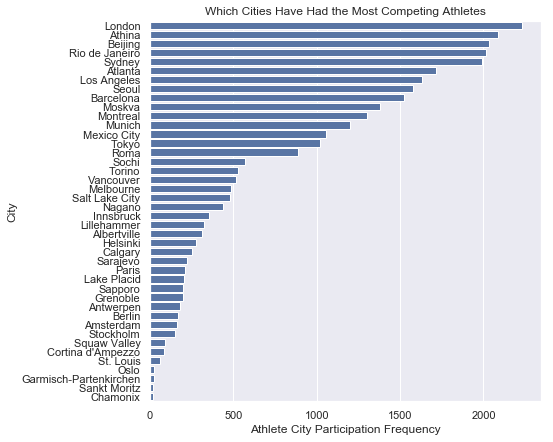

In [36]:
## Lets look at what cities have the most athletes competing.

city_color = sns.color_palette()[0]
city_order = df2['City'].value_counts().index
sns.countplot(data = df2, y ='City', color = city_color, order = city_order);
plt.title('Which Cities Have Had the Most Competing Athletes');
plt.ylabel('City');
plt.xlabel('Athlete City Participation Frequency');

Out of the 42 cities competing, London has hosted the most athletes.  Chamonix, the least.

## Athlete Gender Participation

Gender counts within the DataFrame

In [97]:
df2.Sex.value_counts()

M    19831
F    10350
Name: Sex, dtype: int64

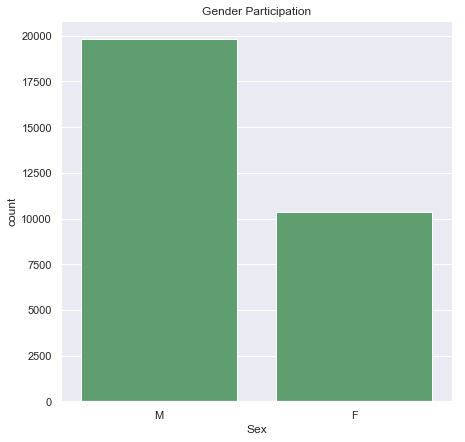

In [38]:

sex_color = sns.color_palette()[2]

sex_order = df2['Sex'].value_counts().index

sns.countplot(data = df2, x ='Sex', color = sex_color, order = sex_order);
plt.title('Gender Participation');


From the period of 1896 to 2016, Male participants total 19,831 and Female participants total 10,350.

Please note, the statement only includes complete data within the data set.  NaN values for Gender values were omitted from results.

In [39]:
df2.Year.describe()

count    30181.000000
mean      1988.005964
std         22.718451
min       1896.000000
25%       1976.000000
50%       1992.000000
75%       2006.000000
max       2016.000000
Name: Year, dtype: float64

# Bivariate Exploration

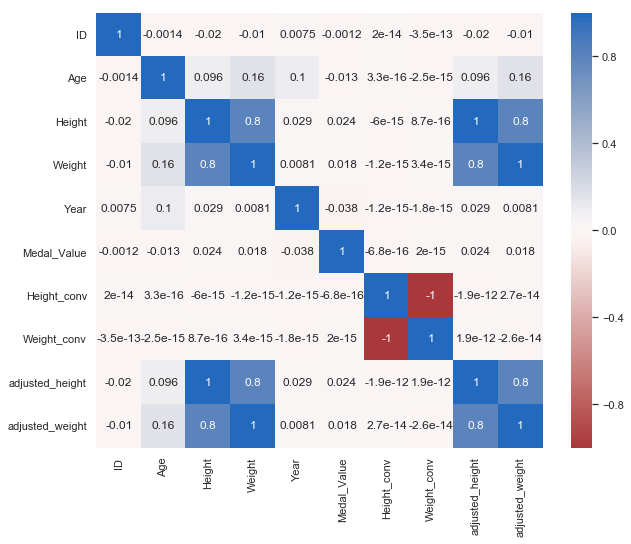

In [40]:
correlation = df2.corr()

plt.subplots(figsize = (10,8))
sns.heatmap(correlation, annot = True, cmap = 'vlag_r');

The heatmap helps to identify correlations between the variables.  You can see that adjusted height and weight have a strong positive correlation.

However, our variable of interest, Medal(coded in Medal Value) has no real strong correlations to any other variable. 

## Athlete Weight, Height, Time, etc...

In [41]:
df2.Year = pd.to_datetime(df2.Year, format='%Y')

df2['Year'].describe()

count                   30181
unique                     35
top       2008-01-01 00:00:00
freq                     2035
first     1896-01-01 00:00:00
last      2016-01-01 00:00:00
Name: Year, dtype: object

Are athletes getting bigger faster stronger?

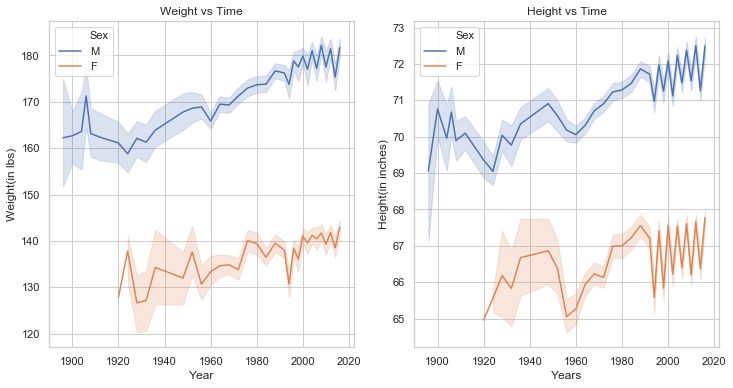

In [101]:
# Have athletes gotten heavier over the years?
# Have athletes gotten taller over the years?

f,axs = plt.subplots(2,2, figsize = (12,6))

plt.subplot(1,2,1)
sns.lineplot(data = df2, x = 'Year', y = 'adjusted_weight', hue = 'Sex');
plt.title('Weight vs Time')
plt.xlabel('Year')
plt.ylabel('Weight(in lbs)')

plt.subplot(1,2,2)
sns.lineplot(data = df2, x = 'Year', y = 'adjusted_height', hue = 'Sex');
plt.title('Height vs Time');
plt.xlabel('Years');
plt.ylabel('Height(in inches)');

The graph on the left depicts Olympian Weight over the span of time from 1896 through 2016.
The graph is seperated by male and female weights.  
Both genders have trended upwards over time in weight. It would be interesting to look at the specific weights within each event.  

The graph on the right depicts Olympian Height over the span of time from 1896 through 2016.
The graph is seperated by male and female heights.  
Height mirrors the weight graph in the sense that height is trending upwards. 

Women were able to compete in the olympics in 1900.  Our data set includes data for women dating back to 1920.

Regardless of graph, both genders peaked in height and weight in the 2016 olympics.

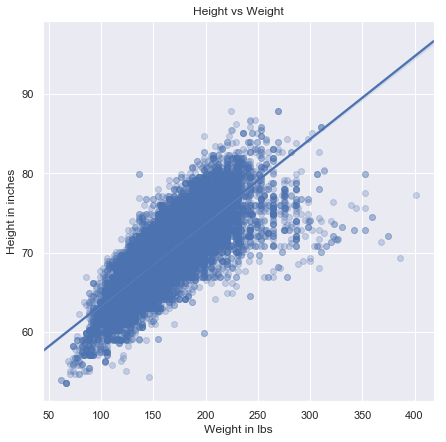

In [43]:
# Lets look at the plot between height and weight.  This ties back into the correlation within the heatmap above.

sns.regplot(data = df2, x = 'adjusted_weight', y = 'adjusted_height', 
            x_jitter = .03, y_jitter = .03, scatter_kws = {'alpha': 1/4});
plt.title('Height vs Weight');
plt.xlabel('Weight in lbs');
plt.ylabel('Height in inches');

There is a strong positive relationship between height and weight.  This verifies the correlation between the two in the heatmap above.

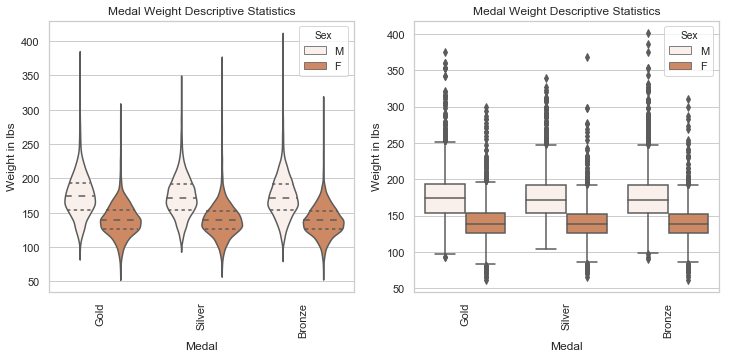

In [103]:
# Medals and Weight Histogram and Violin Plot Per Gender

medal_body_color = sns.color_palette()[1]

plt.figure(figsize = [12,5])

plt.subplot(1,2,1)
ax1 = sns.violinplot(data = df2, x = 'Medal', y = 'adjusted_weight', hue = 'Sex', color = medal_body_color, inner = 'quartile');
plt.xticks(rotation = 90);
plt.ylabel('Weight in lbs')
plt.title('Medal Weight Descriptive Statistics');

plt.subplot(1,2,2)
ax1 = sns.boxplot(data = df2, x = 'Medal', y = 'adjusted_weight', hue = 'Sex', color = medal_body_color);
plt.xticks(rotation = 90);
plt.ylabel('Weight in lbs');
plt.title('Medal Weight Descriptive Statistics');

Want that Gold...
If you're a male, your golden opportunity lies somewhere in between 150 and 200 lbs.  
If you're a female, your golden opportunity lies somewhere in between 130 and 155 lbs.  

If you ain't first, you're last(TM. Ricky Bobby).  No need to discuss Silver or Bronze.

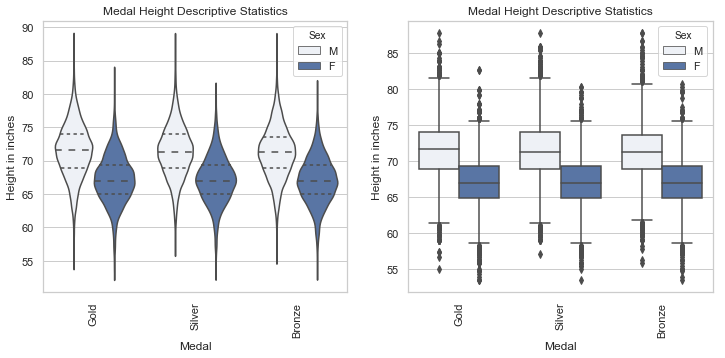

In [104]:
# Medals and Height Histogram and Violin Plot Per Gender

medal_body_color = sns.color_palette()[0]

plt.figure(figsize = [12,5])

plt.subplot(1,2,1)
ax1 = sns.violinplot(data = df2, x = 'Medal', y = 'adjusted_height', hue = 'Sex', color = medal_body_color, inner = 'quartile');
plt.xticks(rotation = 90);
plt.ylabel('Height in inches');
plt.title('Medal Height Descriptive Statistics');

plt.subplot(1,2,2)
ax1 = sns.boxplot(data = df2, x = 'Medal', y = 'adjusted_height', hue = 'Sex', color = medal_body_color);
plt.xticks(rotation = 90);
plt.ylabel('Height in inches');
plt.title('Medal Height Descriptive Statistics');

If you're a male, you better hope to be somewhere between 68 and 73 inches(5'6" and 6'08")
How tall am I?  5'10 inches...So you're saying there's a chance!

If you're a female, you're olympic dreams have a better shot at fruition between 65 and 68 inches(5'4" and 5'7")

In [ ]:
BMI coming into play...

In [46]:
# BMI coming into play...

df2['BMI'] =(df2['adjusted_weight'] / df2['adjusted_height']**2) * 703

BMI is used to broadly define different weight groups. The same groups apply to both men and women.

Underweight: BMI is less than 18.5
Normal weight: BMI is 18.5 to 24.9
Overweight: BMI is 25 to 29.9
Obese: BMI is 30 or more

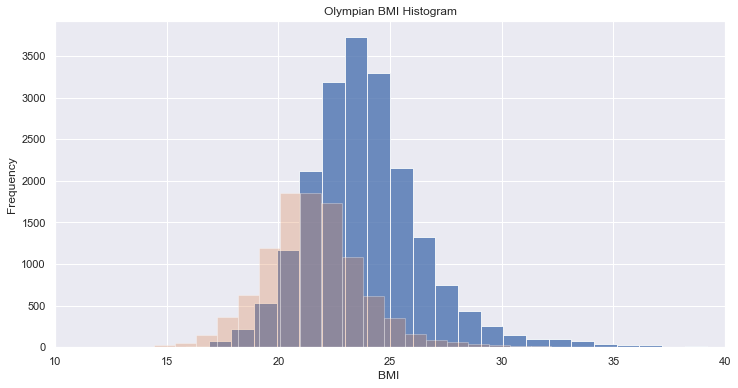

In [105]:
sns.set()
plt.figure(figsize=(12,6))

df2[df2['Sex']=='M']['BMI'].plot(kind='hist',alpha=.8,bins=40)
df2[df2['Sex']=='F']['BMI'].plot(kind='hist',alpha=.3,bins=40)
plt.title('Olympian BMI Histogram');
plt.xlabel('BMI ');
plt.xlim(10,40);

In [48]:
Male_BMI = df2[df2['Sex']=='M']['BMI'].median()
Male_BMI_Avg =df2[df2['Sex']=='M']['BMI'].mean()

print('The Male Olympian Median BMI is:', round(Male_BMI), 'The average Male BMI is:', round(Male_BMI_Avg))
print('\n')

Fem_BMI = df2[df2['Sex']=='F']['BMI'].median()
Fem_BMI_Avg =df2[df2['Sex']=='F']['BMI'].mean()

print('The Female Olympian Median BMI is:', round(Fem_BMI), 'The average Female BMI is:', round(Fem_BMI_Avg))

The Male Olympian Median BMI is: 24 The average Male BMI is: 24


The Female Olympian Median BMI is: 21 The average Female BMI is: 22


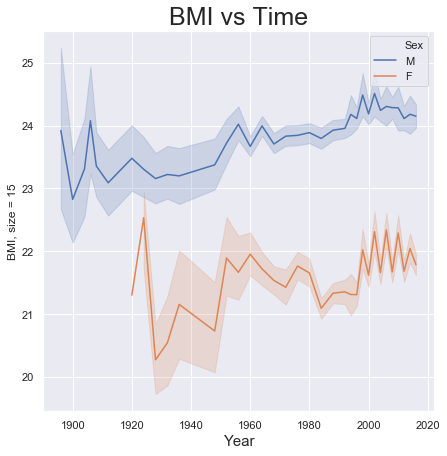

In [49]:
#BMI and Time

sns.lineplot(data = df2, x = 'Year', y = 'BMI', hue = 'Sex');
plt.title('BMI vs Time', size = 25);
plt.xlabel('Year', size = 15);
plt.ylabel('BMI, size = 15');

The graph shows what the BMI index for male and female athletes looks like over time.

Men seem to be trending downward after a peak in the early 2000's

Women are also trending downward.  Women BMI peaked early into women competition, sometime between 1920 and 1930

Age is just a number

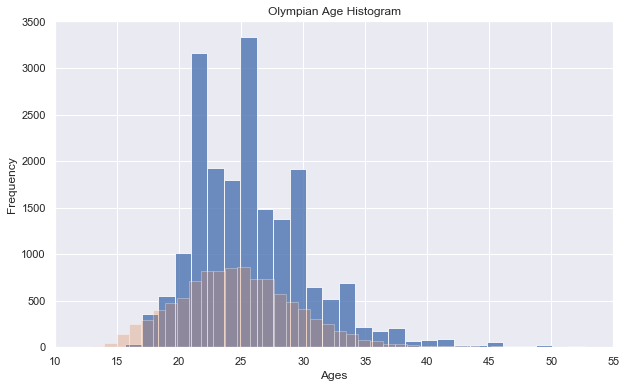

In [50]:
# What do the ages of competing olympians look like?
sns.set()
plt.figure(figsize=(10,6))
df2[df2['Sex']=='M']['Age'].plot(kind='hist',alpha=.8,bins=40)
df2[df2['Sex']=='F']['Age'].plot(kind='hist',alpha=.3,bins=40)
plt.title('Olympian Age Histogram');
plt.xlabel('Ages');
plt.xlim(10,55);

In [51]:
Male_Med = df2[df2['Sex']=='M']['Age'].median()
Male_Avg =df2[df2['Sex']=='M']['Age'].mean()

print('The Male Olympian Median Age is:', round(Male_Med), 'The average Male age is:', round(Male_Avg))
print('\n')

Fem_Med = df2[df2['Sex']=='F']['Age'].median()
Fem_Avg =df2[df2['Sex']=='F']['Age'].mean()

print('The Female Olympian Median Age is:', round(Fem_Med), 'The average Female age is:', round(Fem_Avg))

The Male Olympian Median Age is: 25 The average Male age is: 26


The Female Olympian Median Age is: 24 The average Female age is: 25


In [52]:
# How athlete participation has trended over the years



Sport Participation

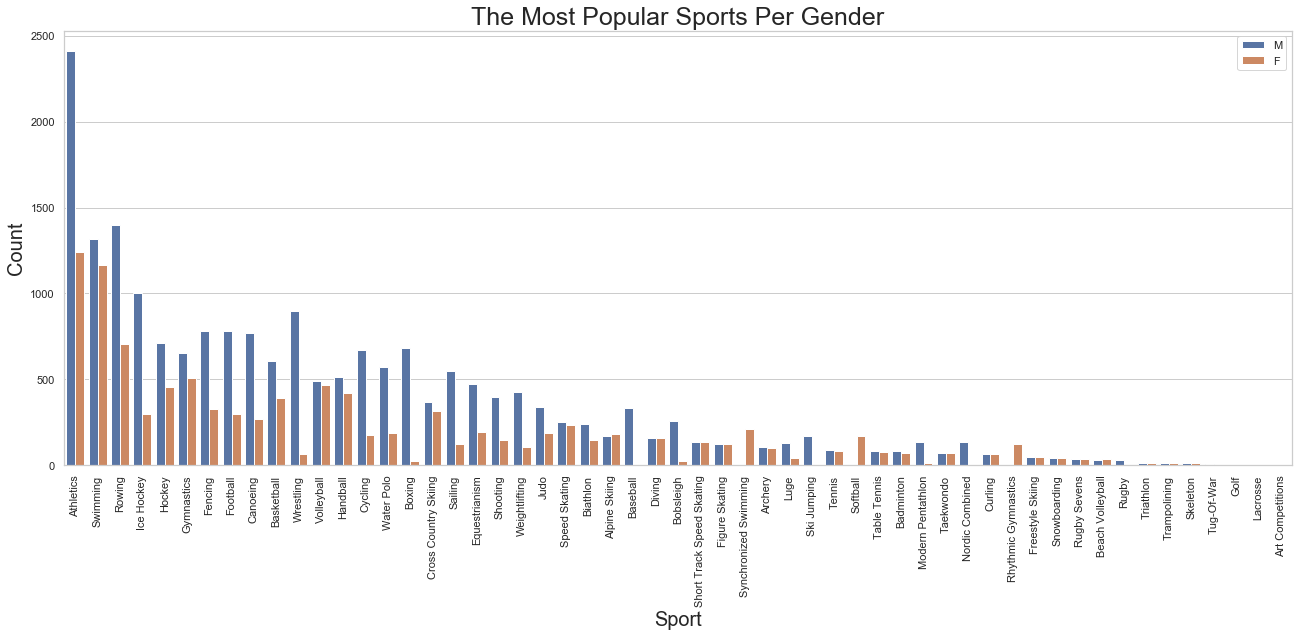

In [108]:
# What are the most popular sports per gender

plt.figure(figsize = [22, 8])

sport_order = df2['Sport'].value_counts().index

sns.set_style('whitegrid')

sns.countplot(data = df2, x = 'Sport', hue = 'Sex', order = sport_order);
plt.xticks(rotation = 90);
plt.title('The Most Popular Sports Per Gender', size = 25)
plt.xlabel('Sport', size = 20)
plt.ylabel('Count', size = 20)
plt.legend(loc = 1);

Looks like Athletics is the clear favorite.  Although, I'm not really sure what it encompasses.  I'm assuming it has something to do with track and field events. Swimming, rowing, and gymnastics seem to be pretty popular. 

I didn't know tug of war was an olympic sport. 

It doesn't look like Im good at anything on this list...darnit!!!  I guess I'll just keep watching on T.V.

In [ ]:
Sport Popularity per Season

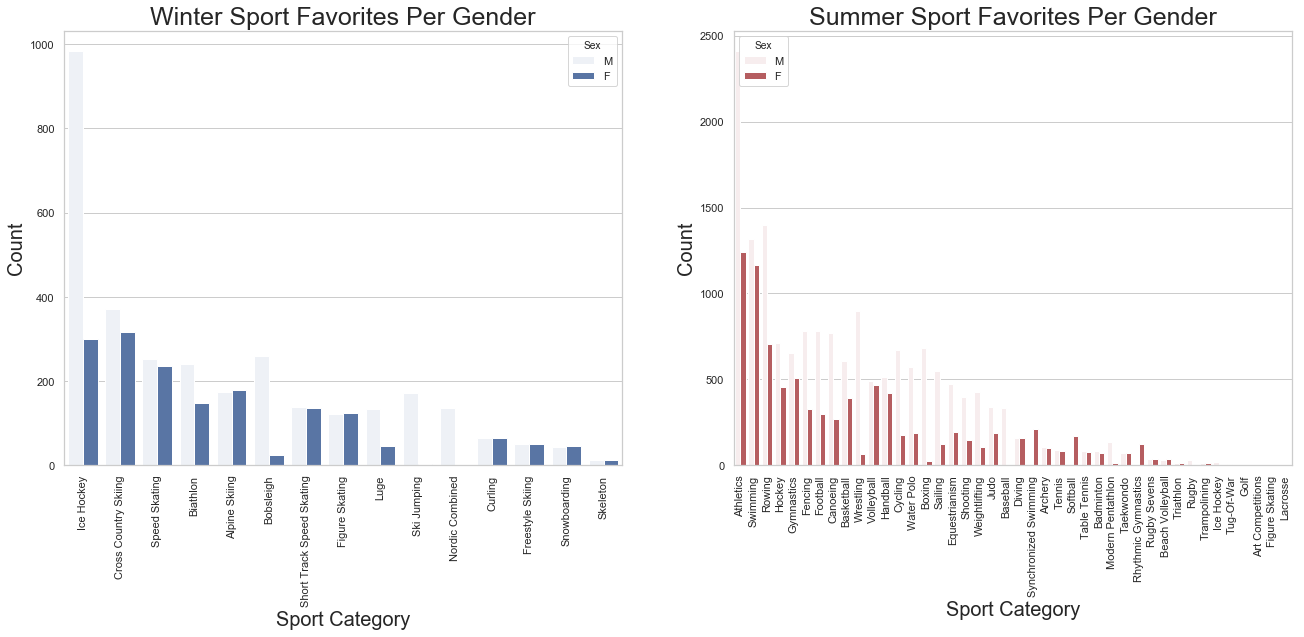

In [109]:
# What are the most popular sports per Season per Gender
winter_games =df2.query('Season == "Winter"');

winter_color = sns.color_palette()[0]
winter_order = winter_games['Sport'].value_counts().index

summer_games = df2.query('Season == "Summer"');
summer_order = summer_games['Sport'].value_counts().index
summer_color = sns.color_palette()[3]

plt.figure(figsize = [22, 8])

plt.subplot(1,2,1)
sns.countplot(data = winter_games, x = 'Sport', hue = 'Sex', color = winter_color, order = winter_order);
plt.title('Winter Sport Favorites Per Gender', size = 25);
plt.xticks(rotation = 90);
plt.xlabel('Sport Category', size =20);
plt.ylabel('Count', size = 20);

plt.subplot(1,2,2)
sns.countplot(data = summer_games, x = 'Sport', hue = 'Sex', color = summer_color, order = summer_order);
plt.title('Summer Sport Favorites Per Gender', size = 25);
plt.xticks(rotation = 90);
plt.xlabel('Sport Category', size =20);
plt.ylabel('Count', size = 20);

Looks like Ice hockey takes the cake when the temperature drops.  Cross country skiing does not sound fun, but hey, to each their own. Speed skating looks to have somewhat equal participation between men and women.  

In the summer months, Athletics is in the lead.  Again, I think this category relates to track and field events. Swimming comes in second in popularity in the summer, followed by rowing. Athletics and rowing have a somewhat equal participation rate between men and women.  

### Adding Definitions for further exploration.

In [55]:
def groupby_sum(column_name1, column_name2):
    grp_sum = df2.groupby(column_name1)[column_name2].sum()
    
    return grp_sum

In [56]:
def groupby(column_name1, column_name2):
    grp = df2.groupby(column_name1)[column_name2]
    
    return grp

In [57]:
def groupby_three(column_name1, column_name2, column_name3):
    grp_three = df2.groupby(column_name1)[column_name2,column_name3]
    
    return grp_three

In [58]:
def groupby_four(column_name1, column_name2, column_name3, column_name4):
    grp_four = df2.groupby(column_name1)[column_name2,column_name3, column_name4]
    
    return grp_four


In [59]:
def minimum(column_name):
    min_id = df2[column_name].idxmin()
    min_stats = pd.DataFrame(df2.loc[min_id])
    
    return min_stats       

In [60]:
def maximum(column_name):
    max_id = df2[column_name].idxmax()
    max_stats = pd.DataFrame(df2.loc[max_id])
    
    return max_stats

In [61]:
def val_counts(column_name):
    
    v_count = df2[column_name].value_counts()
    
    return v_count

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 21 columns):
ID                 30181 non-null int64
Name               30181 non-null object
Sex                30181 non-null object
Age                30181 non-null float64
Height             30181 non-null float64
Weight             30181 non-null float64
Team               30181 non-null object
NOC                30181 non-null object
Games              30181 non-null object
Year               30181 non-null datetime64[ns]
Season             30181 non-null object
City               30181 non-null object
Sport              30181 non-null object
Event              30181 non-null object
Medal              30181 non-null category
Medal_Value        30181 non-null int64
Height_conv        30181 non-null float64
Weight_conv        30181 non-null float64
adjusted_height    30181 non-null float64
adjusted_weight    30181 non-null float64
BMI                30181 non-null float64
dtypes: cate

# Multivariate Exploration

#BMI against height and weight


plt.figure(figsize=(15,10))

plt.scatter(data = df2['Adjusted_Height'], df2['Adjusted_Weight'],cmap="jet",
            c=df2["BMI"],linewidth=.4,edgecolor = "k")
lab = plt.colorbar()
lab.set_label("Body Mass Index",fontsize = 13)
plt.xlabel("Height_in_centimeters")
plt.ylabel("Weight in kilograms")
plt.title("Height and weight of atheletes w.r.t BMI",color = "navy")
plt.show()

p_gold = df2[df2['Medal'] == 'Gold']

plt.figure(figsize=(15,10))


sns.lineplot(data = p_gold, x = 'Year', y = 'BMI', hue = 'Sex')
plt.xlabel('Year', size = 15)
plt.xticks(rotation = 90)
plt.title('BMI vs Years- Gold Medal')

C:\Users\A.J\Anaconda3a\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


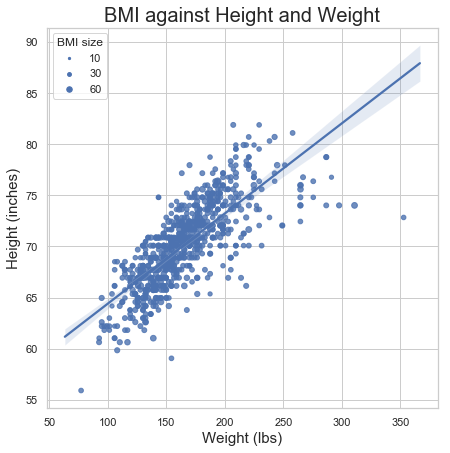

In [85]:
# Height Weight and BMI w size

#sample used to improve readability
sample = np.random.choice(df2.shape[0], 8000, replace = False)
df2_sample = df2.loc[sample]

sns.regplot(data = df2_sample, x = 'adjusted_weight', y = 'adjusted_height', 
           x_jitter = .08, scatter_kws = {'s': df2['BMI']});

plt.xlabel('Weight (lbs)', size = 15);
plt.ylabel('Height (inches)', size = 15);
plt.title('BMI against Height and Weight', size = 20);
sizes = [10, 30, 60]
colored = sns.color_palette()[0]
legend_obj = []

for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s/2, color = colored))    
plt.legend(legend_obj, sizes, title = 'BMI size');

The above graph is easily understandable, but vaguely interpretable. BMI is correlated to height and weight.  The larger each variable is, the larger your BMI.

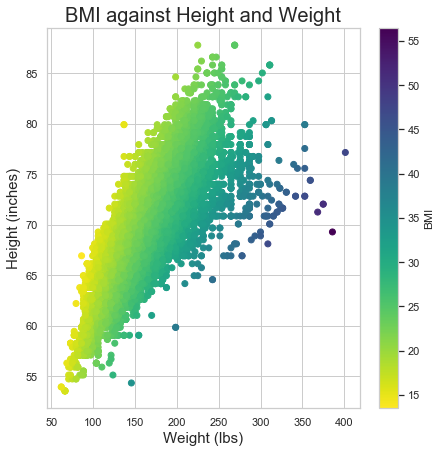

In [64]:
#BMI against height and weight w color

plt.scatter(data = df2, x = 'adjusted_weight', y = 'adjusted_height', c  = 'BMI', cmap = 'viridis_r');
# alpha = 1/3 if I wanted to make the points translucent.
plt.colorbar(label = 'BMI');
plt.xlabel('Weight (lbs)', size = 15);
plt.ylabel('Height (inches)', size = 15);
plt.title('BMI against Height and Weight', size = 20);

Using color for BMI instead of size makes the graph much easier to interpret in my opinion.  The darker the color, the higher the BMI.  

A sample was not used so that the full effect of the data can be taken into account.

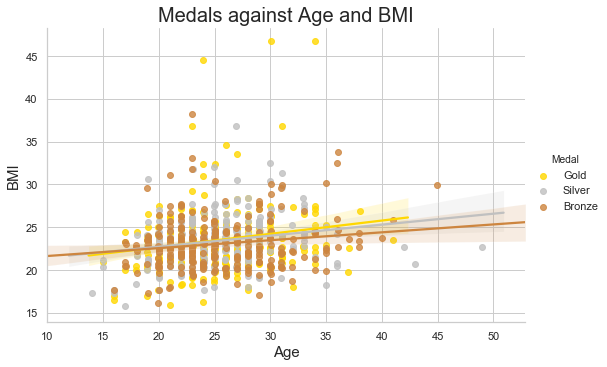

In [65]:
# Age vs BMI and Medals
#medal was made a categorical variable towards the top of the notebook
hue_order  = ['Gold', 'Silver', 'Peru']
g = sns.FacetGrid(data = df2_sample, hue = 'Medal',
                 height = 5, aspect = 1.5, palette = coloro);
g = g.map(sns.regplot, 'Age', 'BMI', x_jitter = .04);
g.add_legend();
plt.xlabel('Age', size = 15);
plt.ylabel('BMI', size = 15);
plt.title('Medals against Age and BMI', size = 20);

The graph depicts your chances of winning a medal against age and BMI.

If anyone wants a chance at winning as they get older, BMI needs to be lower.  

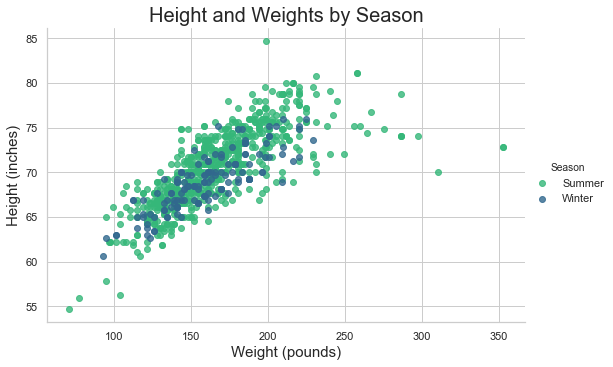

In [66]:
hue_order  = ['Gold', 'Silver', 'Peru']
g = sns.FacetGrid(data = df2_sample, hue = 'Season',
                 height = 5, aspect = 1.5, palette = 'viridis_r');
g = g.map(sns.regplot, 'adjusted_weight', 'adjusted_height', x_jitter = .04, fit_reg = False);

g.add_legend();
plt.xlabel('Weight (pounds)', size = 15);
plt.ylabel('Height (inches)', size = 15);
plt.title('Height and Weights by Season', size = 20);

In [67]:
winter_weight = df2.query('Season == "Winter"')
summer_weight = df2.query('Season == "Summer"')

wh = winter_weight.adjusted_height.mean()
wmean = winter_weight.adjusted_weight.mean()

sh = summer_weight.adjusted_height.mean()
smean = summer_weight.adjusted_weight.mean()

In [68]:
print('The winter athlete average weight:', int(wmean))
print('The winter athlete average height:', int(wh))
print('\n')
print('The summer athlete average weight:', int(smean))
print('The summer athlete average height:', int(sh))

The winter athlete average weight: 160
The winter athlete average height: 69


The summer athlete average weight: 163
The summer athlete average height: 70


The graph above looks at a sample of athlete height and weight per season.  Once averages come into play, there is not too much difference in the body composition as a whole between summer and winter athletes. 

The funny thing is I would have guessed winter athletes as being heavier. However, winter athletes ended up being lighter...if ever so slightly.

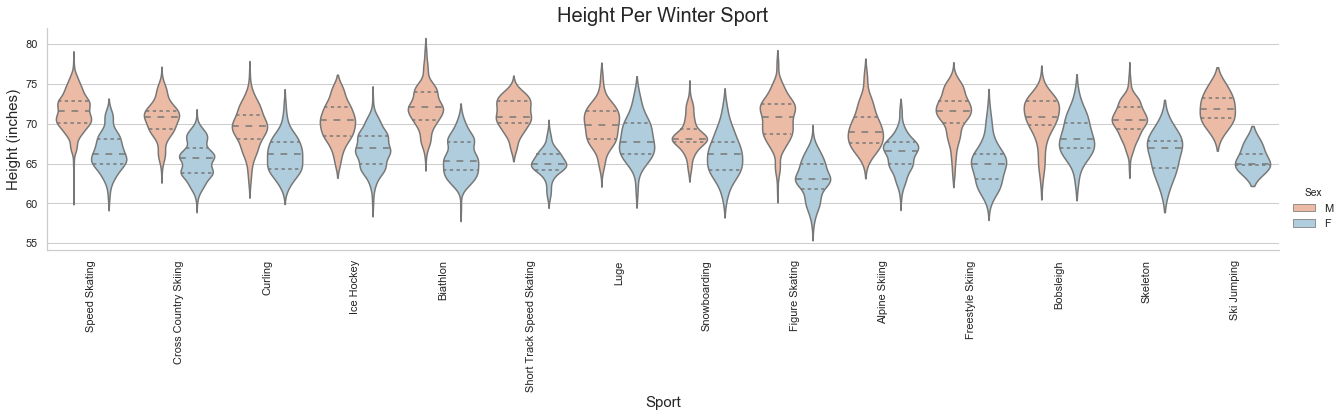

In [69]:
# Winter Athlete Sport Characteristics

ordered = winter_weight.adjusted_height.value_counts().index
c = sns.FacetGrid(data = winter_weight, hue = 'Sex', 
                 height = 4,aspect = 4.5, palette = 'viridis');
c = c.map(sns.violinplot, 'Sport', 'adjusted_height','Sex', inner = 'quartile', hue_order = ['M','F'], order = None,
         palette = 'RdBu');
c.add_legend()
plt.xlabel('Sport', size = 15);
plt.ylabel('Height (inches)', size = 15);
plt.title('Height Per Winter Sport', size = 20);
plt.xticks(rotation = 90);

The above graph shows height characteristics for the different Winter Sports. 

I thought it was interesting to see how close gender height characteristics are in luge.  

Height discrepencies are associated with the Biathlon, Figure Skating and Ski Jumping.

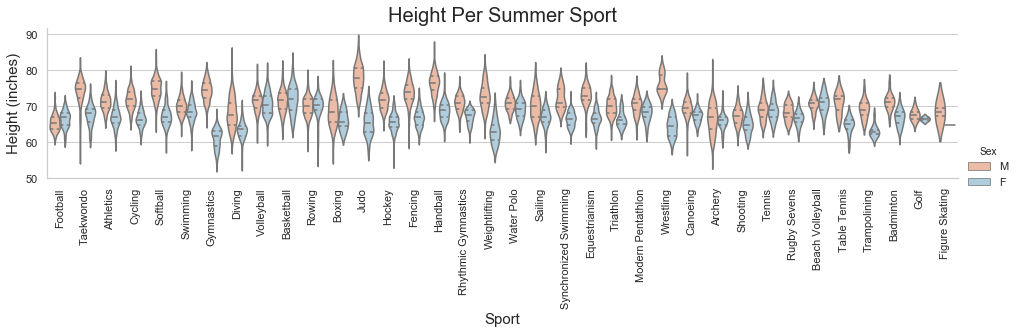

In [94]:
#summer athlete sport characteristics

c = sns.FacetGrid(data = summer_weight, hue = 'Sex', 
                 height = 3,aspect = 4.5, palette = 'viridis_r');
c = c.map(sns.violinplot, 'Sport',  'adjusted_height', 'Sex', inner = 'quartile', hue_order = ['M','F'], order = None,
         palette = 'RdBu');
c.add_legend()
plt.xlabel('Sport', size = 15);
plt.ylabel('Height (inches)', size = 15);
plt.title('Height Per Summer Sport', size = 20);
plt.xticks(rotation = 90);

There are clearly more sports in the Summer games. The above violin plot shows height characteristics of Summer athletes. 

Wrestling, Weight Lifting, Judo, Archery and Diving are a few of the larger gender height discrepencies.

Gender characteristics for Volleybal, Water Polo  and Modern Pentathlon athletes are very similar...interesting!

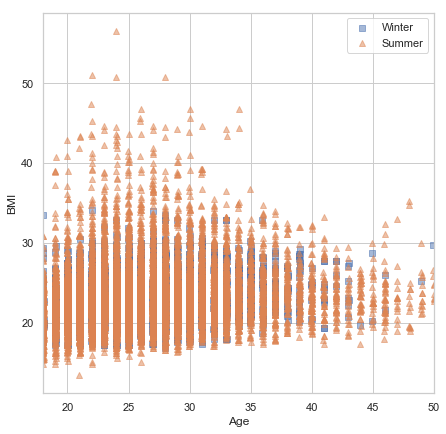

In [71]:
# age and bmi per season via shape...

cat_markers = [['Winter', 's'], ['Summer', '^']]
for cat, markers in cat_markers:
    plot_data = df2.loc[df2['Season'] == cat]     
    sns.regplot(data = plot_data, x = 'Age', y = 'BMI', x_jitter = .04, fit_reg = False, marker = markers, scatter_kws={'alpha':0.5})    
plt.xlabel('Age');
plt.xlim(18,50)
plt.ylabel('BMI');
plt.legend(['Winter', 'Summer']);

C:\Users\A.J\Anaconda3a\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


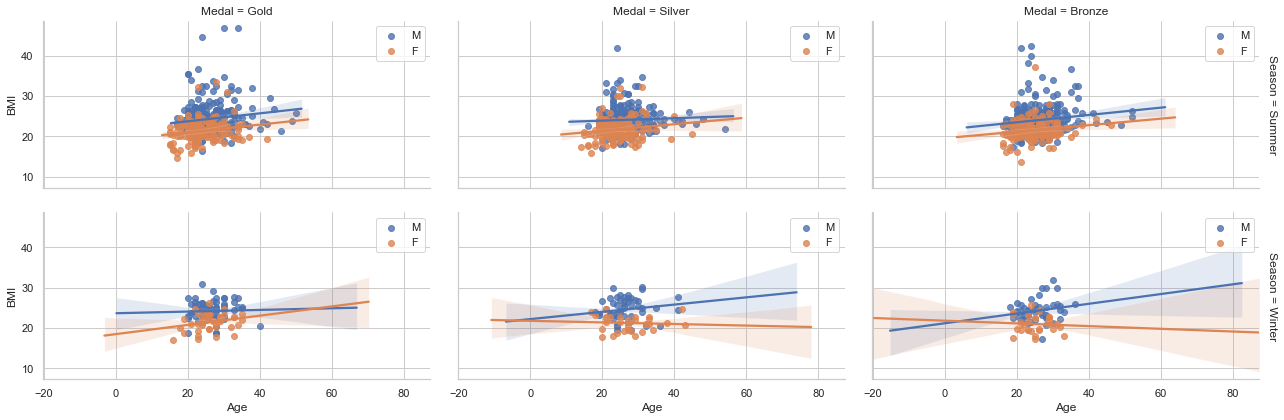

In [95]:
# lets break down age and BMI even further per medal, per gender and per season
#hue and row are interchangeable...

sample2 = np.random.choice(df2.shape[0], 16000, replace = False);
df2_sample2 = df2.loc[sample2];

f = sns.FacetGrid(data = df2_sample2, col = 'Medal', row ='Season', hue = 'Sex', margin_titles = True, aspect = 2)
f.map(sns.regplot, 'Age', 'BMI');

for ax in f.axes.ravel():
    ax.legend()

Regplot of a sample of competitor performance and medals awarded for age and BMI.

Male's tend to have larger BMI's than female for most age ranges. 

BMI's tend to be higher for both genders in the Summer games. 

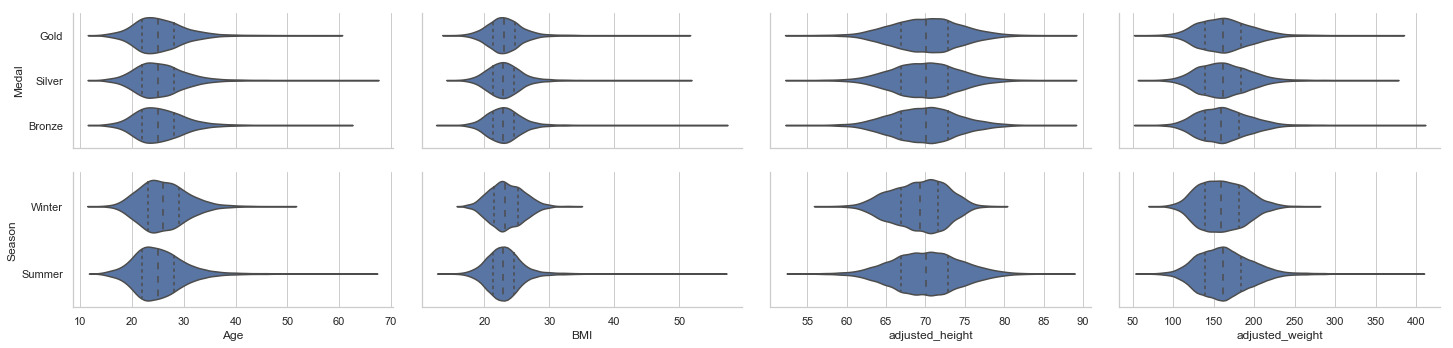

In [73]:
#plot matrix
p = sns.PairGrid(data = df2, x_vars = ['Age', 'BMI', 'adjusted_height', 'adjusted_weight'], y_vars = ['Medal', 'Season'], aspect = 2);
p.map(sns.violinplot, inner = 'quartile');

The plot matrix presents side by side medal and season charactersitics for age, BMI, height, and weight.  

You can quickly notice that Summer athletes may compete at older stages in their lives. BMI's and weight tend to also be higher in the Summer Season.

The characteristics for medal placement are not too different from one another. 

I hope you found this exploration as interesting as I did.  I better start practicing and perfecting my skills for the next games.  

I'm going for Gold!